### **Multi Layer Perceptron (MLP)**

Text(0, 0.5, 'Loss Value')

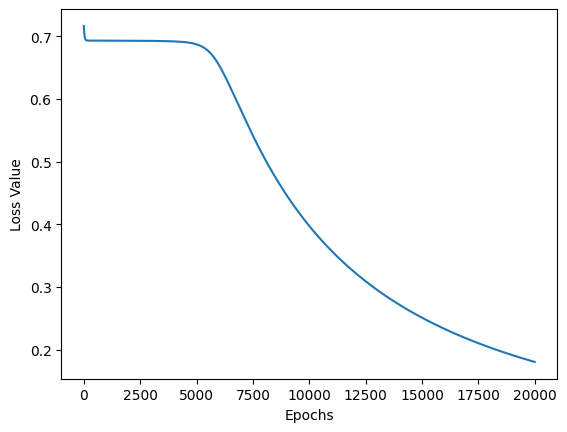

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([0, 1, 1, 0])  # XOR gate
# y= np.array([1, 0, 0, 1])  # XNOR gate

no_x = 2
no_y = 1
no_h = 2
tot = x.shape[1]
lr = 0.1
np.random.seed(2)

w1 = np.random.rand(no_h, no_x)
w2 = np.random.rand(no_y, no_h)

losses = []


def back_prop(tot, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / tot
    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T) / tot
    dw1 = np.reshape(dw1, w1.shape)
    dw2 = np.reshape(dw2, w2.shape)
    return dz2, dw2, dz1, dw1


epochs = 20000


def sigmoid(z):
    z = 1 / (1 + np.exp(-z))
    return z


def frwd_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2


for i in range(epochs):
    z1, a1, z2, a2 = frwd_prop(w1, w2, x)
    loss = -(1 / tot) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    losses.append(loss)
    da2, dw2, dz1, dw1 = back_prop(tot, w1, w2, z1, a1, z2, a2, y)
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1


plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")

In [2]:
def predict(w1,w2,input):
    z1,a1,z2,a2=frwd_prop(w1,w2,mlp_test)
    a2=np.squeeze(a2)
    if a2 >= 0.5:
        print("For Input", [i[0] for i in input], "Output is 1")
    else:
        print("For Input", [i[0] for i in input], "Output is 0")
        

mlp_test = np.array([[1],[0]])
predict(w1,w2,mlp_test)
mlp_test = np.array([[0],[0]])
predict(w1,w2,mlp_test)
mlp_test = np.array([[0],[1]])
predict(w1,w2,mlp_test)
mlp_test = np.array([[1],[1]])
predict(w1,w2,mlp_test)

For Input [1, 0] Output is 1
For Input [0, 0] Output is 0
For Input [0, 1] Output is 1
For Input [1, 1] Output is 0
